In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import pymc3 as pm

In [4]:
df=pd.read_csv('C:/Users/ameimand/Documents/Thinkful/Codes/Data/2008.csv')
df['Season']=np.where(df['Month'] <= 6, '1', '2')
df_top_airport=df[(df['Origin'] == 'ATL')|(df['Origin'] == 'ORD')|(df['Origin'] == 'DFW')]
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Season
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,1


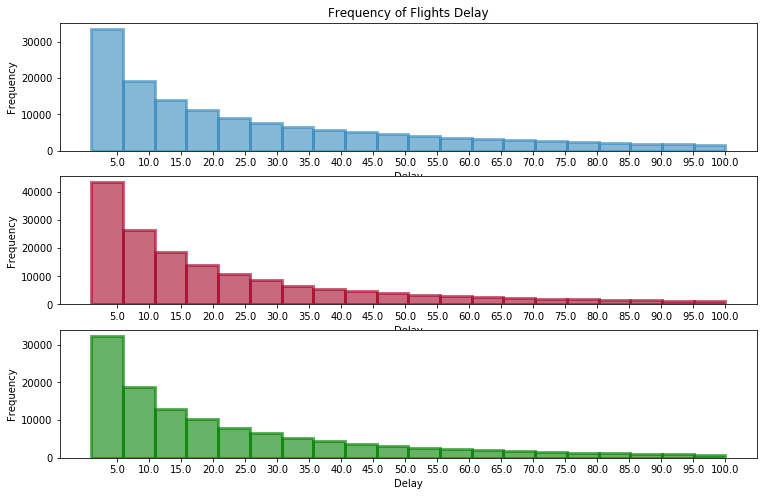

In [10]:
x=df[(df['Origin'] == 'ORD')&(df['DepDelay']>0)]
x=x['DepDelay'].fillna(0)

y=df[(df['Origin'] == 'ATL')&(df['DepDelay']>0)]
y=y['DepDelay'].fillna(0)

z=df[(df['Origin'] == 'DFW')&(df['DepDelay']>0)]
z=z['DepDelay'].fillna(0)

Bin=20
Max=100
a = np.arange(Bin)*(Max/Bin)+(Max/Bin)
plt.figure(figsize=(12.5, 8))

plt.subplot(3, 1, 1)
plt.xticks(a , a)
plt.hist(x,range=[1, Max],bins=Bin, cumulative=False, color='#348ABD',alpha=0.60,edgecolor='#348ABD', lw="3") 
plt.ylabel("Frequency")
plt.xlabel("Delay")
plt.title("Frequency of Flights Delay")

plt.subplot(3, 1, 2)
plt.xticks(a , a)
plt.hist(y,range=[1, Max],bins=Bin, cumulative=False, color='#A60628',alpha=0.60,edgecolor='#A60628', lw="3") 
plt.ylabel("Frequency")
plt.xlabel("Delay")

plt.subplot(3, 1, 3)
plt.xticks(a , a)
plt.hist(z,range=[1, Max],bins=Bin, cumulative=False, color='g',alpha=0.60,edgecolor='g', lw="3") 
plt.ylabel("Frequency")
plt.xlabel("Delay")

plt.show()

In [5]:
z=df[((df['Origin'] == 'ORD')&(df['DepDelay']>0))|((df['Origin'] == 'ATL')&(df['DepDelay']>0))
     |((df['Origin'] == 'DFW')&(df['DepDelay']>0))]
z1=z[['Origin','DepDelay']]

In [6]:
airports = z1.Origin.unique()
airport_lookup = dict(zip(airports, range(len(airports))))
airport = z1['airport_code'] = z1.Origin.replace(airport_lookup).values

C:\Users\ameimand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
z1.head(20)

,Origin,DepDelay,airport_code
94059,ORD,71.0,0
102746,ORD,31.0,0
102807,ORD,1.0,0
103000,ORD,8.0,0
103138,ORD,78.0,0
103218,DFW,19.0,1
103233,DFW,5.0,1
103414,ORD,11.0,0
103767,ORD,5.0,0
103904,ORD,50.0,0


In [9]:
Delay = z1.DepDelay.values

Flight_Delay = pm.Model()

with Flight_Delay:    
    # Prior Distribution
    rate = pm.Gamma('rate', 2, 2,shape=3) 
    
    
    rate_hat=rate[airport]
    # Likelihood (sampling distribution) of observations    
    Y_obs = pm.Exponential('Y_obs', rate_hat, observed=Delay)

In [ ]:
map_estimate = pm.find_MAP(model=Flight_Delay)

map_estimate

logp = -1.5699e+07, ||grad|| = 9.0039e+06:   0%|                                   | 7/5000 [01:19<15:22:57, 11.09s/it]


SystemError: <class 'range'> returned a result with an error set
Apply node that caused the error: Elemwise{Composite{Switch(Cast{int8}(GT(i0, i1)), (log(i0) - (i0 * i2)), i3)}}[(0, 0)](AdvancedSubtensor1.0, TensorConstant{(1,) of 0}, TensorConstant{[71. 31.  ... 80.  3.]}, TensorConstant{(1,) of -inf})
Toposort index: 3
Inputs types: [TensorType(float64, vector), TensorType(int8, (True,)), TensorType(float64, vector), TensorType(float32, (True,))]
Inputs shapes: [(462193,), (1,), (462193,), (1,)]
Inputs strides: [(8,), (1,), (8,), (4,)]
Inputs values: ['not shown', array([0], dtype=int8), 'not shown', array([-inf], dtype=float32)]
Outputs clients: [[Sum{acc_dtype=float64}(Elemwise{Composite{Switch(Cast{int8}(GT(i0, i1)), (log(i0) - (i0 * i2)), i3)}}[(0, 0)].0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.